In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#import cufflinks as cf
#import plotly.graph_objs as go 
#from plotly.offline import init_notebook_mode,plot,iplot
#cf.go_offline()
#init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
df=pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df = df[["main_category","usd_goal_real","country","backers","state"]]
df.head()

,main_category,usd_goal_real,country,backers,state
0,Publishing,1533.95,GB,0,failed
1,Film & Video,30000.00,US,15,failed
2,Film & Video,45000.00,US,3,failed
3,Music,5000.00,US,1,failed
4,Film & Video,19500.00,US,14,canceled


In [4]:
df["usd_goal_real"].describe()

count    3.786610e+05
mean     4.545440e+04
std      1.152950e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.550000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

In [5]:
df["goalClf"] = np.where((df["usd_goal_real"] <1000),1,0)
df["goalClf"].describe()

count    378661.000000
mean          0.126403
std           0.332304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: goalClf, dtype: float64

In [6]:
df["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended'], dtype=object)

In [7]:
df = df[(df["state"] != "live")&(df["state"] != "undefined")&(df["state"] != "suspended")]
df["state"].unique()

array(['failed', 'canceled', 'successful'], dtype=object)

In [8]:
df["state"] = np.where((df["state"] == "canceled"),"failed",df["state"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370454 entries, 0 to 378660
Data columns (total 6 columns):
main_category    370454 non-null object
usd_goal_real    370454 non-null float64
country          370454 non-null object
backers          370454 non-null int64
state            370454 non-null object
goalClf          370454 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 19.8+ MB


In [9]:
df["state"].unique()

array(['failed', 'successful'], dtype=object)

In [10]:
df['state'].replace(['successful','failed'],[1,0],inplace=True)

In [11]:
df.head(10)

,main_category,usd_goal_real,country,backers,state,goalClf
0,Publishing,1533.95,GB,0,0,0
1,Film & Video,30000.00,US,15,0,0
2,Film & Video,45000.00,US,3,0,0
3,Music,5000.00,US,1,0,0
4,Film & Video,19500.00,US,14,0,0
5,Food,50000.00,US,224,1,0
6,Food,1000.00,US,16,1,0
7,Food,25000.00,US,40,0,0
8,Design,125000.00,US,58,0,0
9,Film & Video,65000.00,US,43,0,0


# Hypothesis 1: Success expected when goal < 10000 usd

In [12]:
chitest = df[["goalClf","state"]]
chitest.head(10)

,goalClf,state
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,1
7,0,0
8,0,0
9,0,0


In [13]:
x = chitest.groupby([chitest.state,chitest.goalClf]).size()
x

state  goalClf
0      0          213445
       1           23053
1      0          109963
       1           23993
dtype: int64

In [14]:
arr = np.array([[x[1,0],x[0,0]],[x[1,1],x[0,1]]])
arr

array([[109963, 213445],
       [ 23993,  23053]])

In [15]:
arr = [[34899, 108420], [99057, 128078]]

In [16]:
chi_stats = stats.chi2_contingency(arr)

#(t,p)= stats.chisquare([chitest["state"],chitest["goalClf"]],ddof=5)
print("Test t=%f p-value=%f" % (chi_stats[0],chi_stats[1]))

Test t=14120.871500 p-value=0.000000


In [17]:
alpha = 0.05  # significance level 

In [18]:
critical_value = crit = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
                      df = chi_stats[2]) #degree of freedom
critical_value

3.8414588206941236

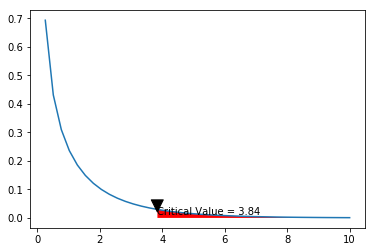

In [19]:
x = np.linspace(0, 10, 40)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.02), xytext=(critical_value, 0.04), 
            arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

# Hypothesis 2: Country is correlated with state

In [41]:
countryGrouped = pd.DataFrame(df["state"].groupby(df["country"]).mean())
countryGrouped

,state
country,
AT,0.185764
AU,0.261685
BE,0.254606
CA,0.284946
CH,0.254076
DE,0.230959
DK,0.332410
ES,0.223230
FR,0.316046


In [42]:
df.state.mean()

0.36159955082142453

In [43]:
countryGrouped["Expected"] = np.where((countryGrouped["state"] < df.state.mean()),0,1)
countryGrouped

,state,Expected
country,,
AT,0.185764,0
AU,0.261685,0
BE,0.254606,0
CA,0.284946,0
CH,0.254076,0
DE,0.230959,0
DK,0.332410,0
ES,0.223230,0
FR,0.316046,0


In [56]:
expectedCountry = (countryGrouped["Expected"]).append(countryGrouped["Expected"])
expectedCountry

country
AT      0
AU      0
BE      0
CA      0
CH      0
DE      0
DK      0
ES      0
FR      0
GB      1
HK      1
IE      0
IT      0
JP      0
LU      0
MX      0
N,0"    1
NL      0
NO      0
NZ      0
SE      0
SG      0
US      1
AT      0
AU      0
BE      0
CA      0
CH      0
DE      0
DK      0
ES      0
FR      0
GB      1
HK      1
IE      0
IT      0
JP      0
LU      0
MX      0
N,0"    1
NL      0
NO      0
NZ      0
SE      0
SG      0
US      1
Name: Expected, dtype: int64

In [63]:
countrytest = df[["country","state"]]
countrytest.head(10)

,country,state
0,GB,0
1,US,0
2,US,0
3,US,0
4,US,0
5,US,1
6,US,1
7,US,0
8,US,0
9,US,0


In [75]:
y = pd.DataFrame(countrytest.groupby([countrytest.state,countrytest.country]).size())
y["Expected"] = expectedCountry.values

y = y.reset_index(level=["state","country"])
y = y.drop("country",axis=1)
y

,state,0,Expected
0,0,469,0
1,0,5671,0
2,0,445,0
3,0,10374,0
4,0,549,0
5,0,3120,0
6,0,723,0
7,0,1712,0
8,0,1965,0
9,0,21148,1


### State and Country

In [81]:
groupbycountry = pd.DataFrame(y.groupby([y.state,y.Expected]).sum())
groupbycountry

0
state Expected        
0     0          34503
      1         201995
1     0          12269
      1         121687

In [86]:
arr = np.array([[groupbycountry[0][1][0],groupbycountry[0][0][0]],[groupbycountry[0][1][1],groupbycountry[0][0][1]]])
arr

array([[ 12269,  34503],
       [121687, 201995]])

In [87]:
chi_stats = stats.chi2_contingency(arr)

#(t,p)= stats.chisquare([chitest["state"],chitest["goalClf"]],ddof=5)
print("Test t=%f p-value=%f" % (chi_stats[0],chi_stats[1]))

Test t=2285.335205 p-value=0.000000


In [88]:
alpha = 0.05  # significance level 

In [89]:
critical_value = crit = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
                      df = chi_stats[2]) #degree of freedom
critical_value

3.8414588206941236

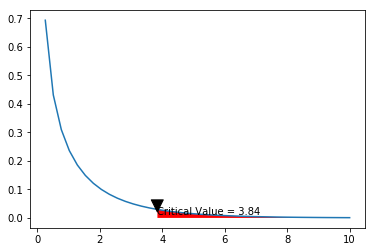

In [90]:
x = np.linspace(0, 10, 40)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.02), xytext=(critical_value, 0.04), 
            arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)